In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
with open('WhatsApp Chat with Aviral.txt', encoding='utf8') as f:
    lines = []
    for line in f:
        if(line[6:10] == '2021' or line[6:10] == '2022'):
            lines.append(line[:-1])

In [3]:
lines_list = []
for line in lines:
    date = line[:10]
    time = line[12:17]
    message = line[20:]
    Msg = message.split(':', 1)
    if Msg[1:]:
        name = Msg[0]
        msg = Msg[1]
    else:
        name = 'Group Notification'
        msg = Msg[0]
    lines_list.append([date,time,name,msg])

In [4]:
header = ['date', 'time', 'name','msg']

with open('data.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(lines_list)

In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.head()

,date,time,name,msg
0,07/10/2021,13:04,Group Notification,Messages and calls are end-to-end encrypted. N...
1,07/10/2021,13:04,Aviral,Cllg
2,07/10/2021,13:04,Aviral,Han
3,07/10/2021,13:04,Suryansh Sharma,Konsi book Lani hai
4,07/10/2021,13:04,Suryansh Sharma,??


In [7]:
data['date-time'] = data['date'] + " " + data['time']

In [8]:
data['date-time'] = pd.to_datetime(data['date-time'], format="%d/%m/%Y %H:%M")

In [9]:
data.drop(['date', 'time'], axis = 1, inplace = True)

In [10]:
data.head()

,name,msg,date-time
0,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-10-07 13:04:00
1,Aviral,Cllg,2021-10-07 13:04:00
2,Aviral,Han,2021-10-07 13:04:00
3,Suryansh Sharma,Konsi book Lani hai,2021-10-07 13:04:00
4,Suryansh Sharma,??,2021-10-07 13:04:00


In [11]:
data['year'] = data['date-time'].dt.year

In [12]:
data['month'] = data['date-time'].dt.month_name()

In [13]:
data['day'] = data['date-time'].dt.day

In [14]:
data['hour'] = data['date-time'].dt.hour

In [15]:
data['minute'] = data['date-time'].dt.minute

In [16]:
data['name'].unique()

array(['Group Notification', 'Aviral', 'Suryansh Sharma'], dtype=object)

In [17]:
data['msg'].apply(lambda x : x.startswith(' http')).sum()

26

In [18]:
data[data['name'] == 'Aviral']['msg'].apply(lambda x : x.startswith(' http')).sum()

13

In [19]:
data[data['name'] == 'Suryansh Sharma']['msg'].apply(lambda x : x.startswith(' http')).sum()

13

In [63]:
x = data['name'].value_counts().head()
x

Aviral                223
Suryansh Sharma       143
Group Notification      1
Name: name, dtype: int64

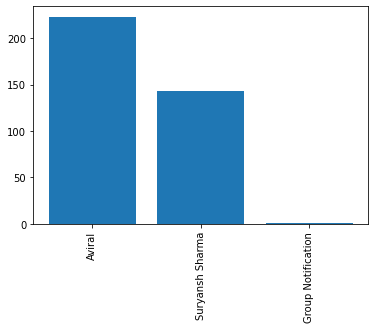

In [21]:
plt.bar(x.index,x.values)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
round((data['name'].value_counts()/data.shape[0])*100, 2).reset_index().rename(columns={'index':'name','name':'percent'})

,name,percent
0,Aviral,60.76
1,Suryansh Sharma,38.96
2,Group Notification,0.27


In [23]:
data

,name,msg,date-time,year,month,day,hour,minute
0,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-10-07 13:04:00,2021,October,7,13,4
1,Aviral,Cllg,2021-10-07 13:04:00,2021,October,7,13,4
2,Aviral,Han,2021-10-07 13:04:00,2021,October,7,13,4
3,Suryansh Sharma,Konsi book Lani hai,2021-10-07 13:04:00,2021,October,7,13,4
4,Suryansh Sharma,??,2021-10-07 13:04:00,2021,October,7,13,4
...,...,...,...,...,...,...,...,...
362,Aviral,Hello my participant,2022-06-23 20:37:00,2022,June,23,20,37
363,Aviral,Hello my participant 👋,2022-06-23 20:42:00,2022,June,23,20,42
364,Aviral,Hello my participant 👋,2022-06-23 20:43:00,2022,June,23,20,43
365,Aviral,https://chat.whatsapp.com/LAx5tOC046oB68j2uwrxhE,2022-06-23 20:44:00,2022,June,23,20,44


In [24]:
temp = data[data['name'] != 'Group Notification']
temp = temp[temp['msg'] != ' <Media omitted>']

In [25]:
from collections import Counter

In [26]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
f.close()

In [27]:
words = []
for message in temp['msg']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [28]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,bhej,9
1,missed,8
2,call,8
3,video,5
4,deleted,4
5,message,4
6,paytm,4
7,participant,4
8,structure,3
9,jayege,3


In [29]:
!pip install emoji

In [30]:
import emoji

In [31]:
emojis = []
for message in data['msg']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [69]:
e_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [72]:
e_df[0].head(50)

0    👋
1    😂
2    ☘
3    😤
4    ✨
5    🥲
Name: 0, dtype: object

In [33]:
data

,name,msg,date-time,year,month,day,hour,minute
0,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-10-07 13:04:00,2021,October,7,13,4
1,Aviral,Cllg,2021-10-07 13:04:00,2021,October,7,13,4
2,Aviral,Han,2021-10-07 13:04:00,2021,October,7,13,4
3,Suryansh Sharma,Konsi book Lani hai,2021-10-07 13:04:00,2021,October,7,13,4
4,Suryansh Sharma,??,2021-10-07 13:04:00,2021,October,7,13,4
...,...,...,...,...,...,...,...,...
362,Aviral,Hello my participant,2022-06-23 20:37:00,2022,June,23,20,37
363,Aviral,Hello my participant 👋,2022-06-23 20:42:00,2022,June,23,20,42
364,Aviral,Hello my participant 👋,2022-06-23 20:43:00,2022,June,23,20,43
365,Aviral,https://chat.whatsapp.com/LAx5tOC046oB68j2uwrxhE,2022-06-23 20:44:00,2022,June,23,20,44


In [34]:
timeline = data.groupby(['year','month']).count()['msg'].reset_index()

In [35]:
timeline

,year,month,msg
0,2021,December,26
1,2021,November,17
2,2021,October,53
3,2022,April,20
4,2022,February,35
5,2022,January,37
6,2022,June,116
7,2022,March,20
8,2022,May,43


In [36]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [37]:
timeline['time'] = time

In [38]:
timeline

,year,month,msg,time
0,2021,December,26,December-2021
1,2021,November,17,November-2021
2,2021,October,53,October-2021
3,2022,April,20,April-2022
4,2022,February,35,February-2022
5,2022,January,37,January-2022
6,2022,June,116,June-2022
7,2022,March,20,March-2022
8,2022,May,43,May-2022


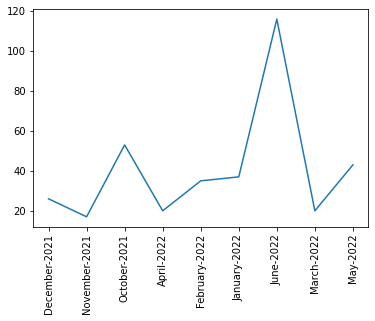

In [39]:
plt.plot(timeline['time'],timeline['msg'])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
data['only-date'] = data['date-time'].dt.date

In [41]:
daily_timeline = data.groupby('only-date').count()['msg'].reset_index()

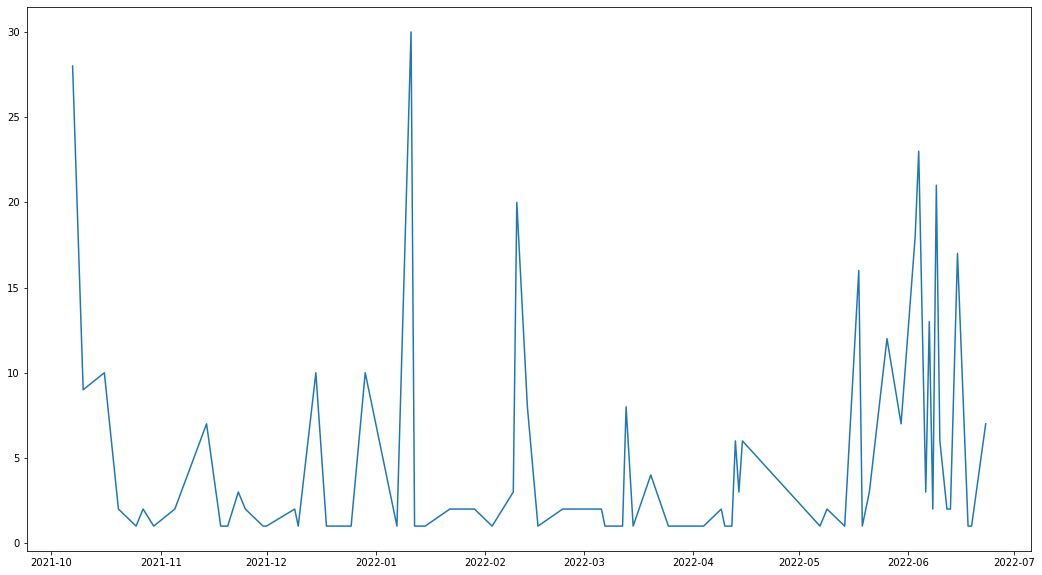

In [42]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only-date'],daily_timeline['msg'])

In [43]:
data

,name,msg,date-time,year,month,day,hour,minute,only-date
0,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07
1,Aviral,Cllg,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07
2,Aviral,Han,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07
3,Suryansh Sharma,Konsi book Lani hai,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07
4,Suryansh Sharma,??,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07
...,...,...,...,...,...,...,...,...,...
362,Aviral,Hello my participant,2022-06-23 20:37:00,2022,June,23,20,37,2022-06-23
363,Aviral,Hello my participant 👋,2022-06-23 20:42:00,2022,June,23,20,42,2022-06-23
364,Aviral,Hello my participant 👋,2022-06-23 20:43:00,2022,June,23,20,43,2022-06-23
365,Aviral,https://chat.whatsapp.com/LAx5tOC046oB68j2uwrxhE,2022-06-23 20:44:00,2022,June,23,20,44,2022-06-23


In [44]:
data['day_name'] = data['date-time'].dt.day_name()

In [45]:
data

,name,msg,date-time,year,month,day,hour,minute,only-date,day_name
0,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
1,Aviral,Cllg,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
2,Aviral,Han,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
3,Suryansh Sharma,Konsi book Lani hai,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
4,Suryansh Sharma,??,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
...,...,...,...,...,...,...,...,...,...,...
362,Aviral,Hello my participant,2022-06-23 20:37:00,2022,June,23,20,37,2022-06-23,Thursday
363,Aviral,Hello my participant 👋,2022-06-23 20:42:00,2022,June,23,20,42,2022-06-23,Thursday
364,Aviral,Hello my participant 👋,2022-06-23 20:43:00,2022,June,23,20,43,2022-06-23,Thursday
365,Aviral,https://chat.whatsapp.com/LAx5tOC046oB68j2uwrxhE,2022-06-23 20:44:00,2022,June,23,20,44,2022-06-23,Thursday


In [46]:
busy_day = data['day_name'].value_counts().reset_index().rename(columns={'index':'day','day_name':'count'})

In [47]:
busy_day

,day,count
0,Thursday,99
1,Wednesday,73
2,Saturday,51
3,Tuesday,49
4,Sunday,43
5,Friday,35
6,Monday,17


In [48]:
busy_month = data['month'].value_counts().reset_index().rename(columns={'index':'month','month':'count'})

In [49]:
busy_month

,month,count
0,June,116
1,October,53
2,May,43
3,January,37
4,February,35
5,December,26
6,March,20
7,April,20
8,November,17


In [50]:
data

,name,msg,date-time,year,month,day,hour,minute,only-date,day_name
0,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
1,Aviral,Cllg,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
2,Aviral,Han,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
3,Suryansh Sharma,Konsi book Lani hai,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
4,Suryansh Sharma,??,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday
...,...,...,...,...,...,...,...,...,...,...
362,Aviral,Hello my participant,2022-06-23 20:37:00,2022,June,23,20,37,2022-06-23,Thursday
363,Aviral,Hello my participant 👋,2022-06-23 20:42:00,2022,June,23,20,42,2022-06-23,Thursday
364,Aviral,Hello my participant 👋,2022-06-23 20:43:00,2022,June,23,20,43,2022-06-23,Thursday
365,Aviral,https://chat.whatsapp.com/LAx5tOC046oB68j2uwrxhE,2022-06-23 20:44:00,2022,June,23,20,44,2022-06-23,Thursday


In [51]:
period = []
for hour in data[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str("00"))
    elif hour == 0:
        period.append(str("00") + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

In [52]:
data['period'] = period

In [53]:
data

,name,msg,date-time,year,month,day,hour,minute,only-date,day_name,period
0,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday,13-14
1,Aviral,Cllg,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday,13-14
2,Aviral,Han,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday,13-14
3,Suryansh Sharma,Konsi book Lani hai,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday,13-14
4,Suryansh Sharma,??,2021-10-07 13:04:00,2021,October,7,13,4,2021-10-07,Thursday,13-14
...,...,...,...,...,...,...,...,...,...,...,...
362,Aviral,Hello my participant,2022-06-23 20:37:00,2022,June,23,20,37,2022-06-23,Thursday,20-21
363,Aviral,Hello my participant 👋,2022-06-23 20:42:00,2022,June,23,20,42,2022-06-23,Thursday,20-21
364,Aviral,Hello my participant 👋,2022-06-23 20:43:00,2022,June,23,20,43,2022-06-23,Thursday,20-21
365,Aviral,https://chat.whatsapp.com/LAx5tOC046oB68j2uwrxhE,2022-06-23 20:44:00,2022,June,23,20,44,2022-06-23,Thursday,20-21


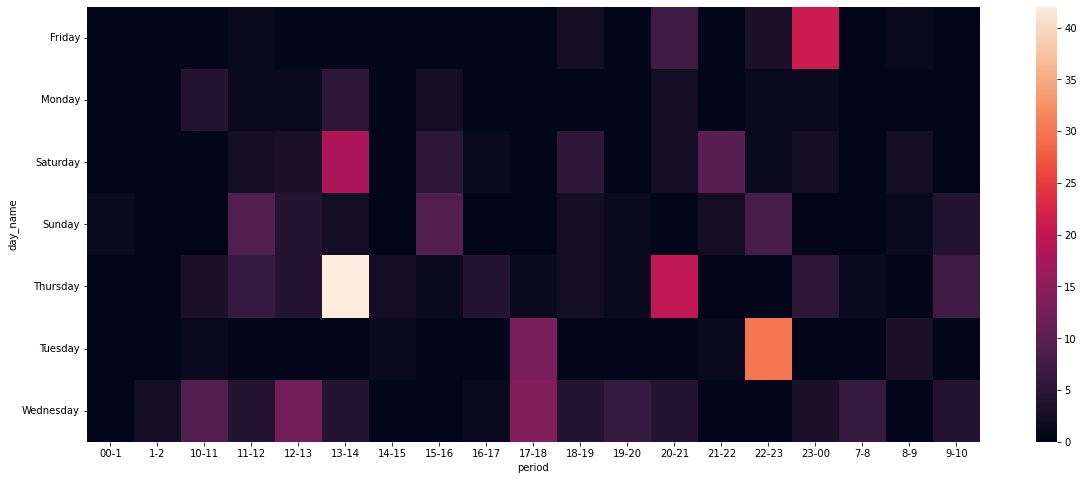

In [54]:
plt.figure(figsize=(20,8))
sns.heatmap(data.pivot_table(index='day_name',columns='period',values='msg',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [1]:
import jovian

<IPython.core.display.Javascript object>

In [2]:
jovian.commit(filename='WCA.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
